In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.ticker import MaxNLocator

sns.set_theme()
# sequence - features
# family_accession labels

In [31]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [32]:
n_files = 5  # no of files to use

df = pd.concat(
    (pd.read_csv(f"data/train/data-000{i:02d}-of-00080") for i in range(n_files))
)
df

,family_id,sequence_name,family_accession,aligned_sequence,sequence
0,GMC_oxred_C,A4WZS5_RHOS5/416-539,PF05199.13,PHPE.SRIRLST.RRDAHGMP.....IP.RIESRLGP............,PHPESRIRLSTRRDAHGMPIPRIESRLGPDAFARLRFMARTCRAIL...
1,DUF2887,K9QI92_9NOSO/3-203,PF11103.8,RDSIYYQIFKRFPALIFEL..VD.NRPPQAQNYRFESVEVKETAFR...,RDSIYYQIFKRFPALIFELVDNRPPQAQNYRFESVEVKETAFRIDG...
2,zf-IS66,Q92LC9_RHIME/32-75,PF13005.7,.TCCPDCGG.E..LRLVGED.AS....EILDMI.AAQMKVIEVARL...,TCCPDCGGELRLVGEDASEILDMIAAQMKVIEVARLKKSCRCCE
3,Asp_decarbox,X2GQZ4_9BACI/1-115,PF02261.16,MLRMMMNSKIHRATVTEADLNYVGSITIDEDILDAVGMLPNEKVHI...,MLRMMMNSKIHRATVTEADLNYVGSITIDEDILDAVGMLPNEKVHI...
4,Filamin,A7SQM3_NEMVE/342-439,PF00630.19,TACPKQ.CTA....RGLG.............LK.AAPVT.QPT..R...,TACPKQCTARGLGLKAAPVTQPTRFVVILNDCHGQPLGRSEGELEV...
...,...,...,...,...,...
13370,Tub_N,F1RNI1_PIG/29-238,PF16322.5,RQRALLEQKQKKKRQEPL.MVQANADGR..PRSRRARQSE.........,RQRALLEQKQKKKRQEPLMVQANADGRPRSRRARQSEEQAPLVESY...
13371,Phospho_p8,A0A1X7VUV4_AMPQE/3-63,PF10195.9,HIYFDEYDY.FNFGSGFDKMFPDNKNTGHSKHKGYKLETQRYSPSG...,HIYFDEYDYFNFGSGFDKMFPDNKNTGHSKHKGYKLETQRYSPSGH...
13372,E3_binding,D5QEH1_KOMHA/126-161,PF02817.17,VFASPVAR.RLARLHEL....DLR..RV..G....G....S.GPRG...,VFASPVARRLARLHELDLRRVGGSGPRGRILRRDIE
13373,CDT1,W5MBI2_LEPOC/258-422,PF08839.11,LPYKYKMLAEMFRCLDTIVSILFNRSETATFAK.VKQGVQDMMH.....,LPYKYKMLAEMFRCLDTIVSILFNRSETATFAKVKQGVQDMMHKRF...


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67892 entries, 0 to 13374
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   family_id         67892 non-null  object
 1   sequence_name     67892 non-null  object
 2   family_accession  67892 non-null  object
 3   aligned_sequence  67892 non-null  object
 4   sequence          67892 non-null  object
dtypes: object(5)
memory usage: 3.1+ MB


In [37]:
# sequences are not unique across the 80 files - should also check if labels are unique
seq_counts = df.sequence.value_counts().sort_values(ascending=False)
seq_counts

sequence
GLYHLTSDSSPAVCISTDAPLLIHNRLGHPSLSKFQKMVPRFSTLSSLPCESCQLGKH                                                                                                                                                                                                                                                      3
RMFVVFAAVKKSKETEETRCLQVIGKANNMWHKRFGHLNHQGLRSLAEKEMVKGLPKFDLGEEEAVCDICLKGKQ                                                                                                                                                                                                                                     2
TLYMTSCPRDTIAVADASTDTSLWHRRLGHMSEKGMKMLLSKGKLPELKSIDFDMCESCILGKQ                                                                                                                                                                                                                                                2
AATLNNLAVLYGKRGKYKEAEPLCKRALEIREKV                                       

In [43]:
for i in range(len(seq_counts)):
    if seq_counts.iloc[i] > 1:
        seq = seq_counts.index[i]
        n_labels = len(df.query("sequence == @seq")["family_accession"].unique())
        if n_labels > 1:
            print(f"{seq} has {n_labels} different labels")
    else:
        break

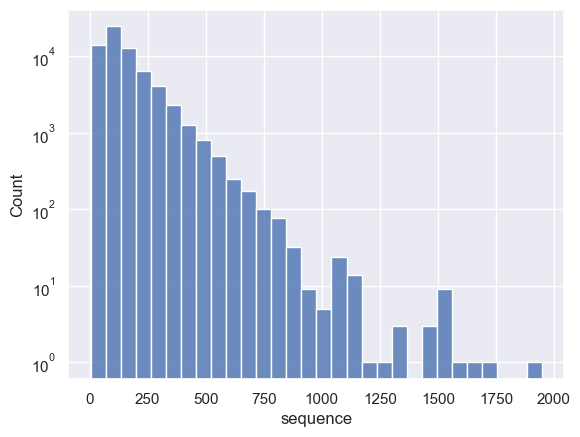

In [6]:
# sequences of different lengths, longest is almost 2000 tokens, could be problematic context window
sns.histplot(x=df.sequence.str.len(), bins=30, alpha=0.8, edgecolor="white", log=True);

In [7]:
df.family_id.value_counts().head(10)

family_id
Methyltransf_25    218
LRR_1              125
Acetyltransf_7     119
His_kinase         105
Lum_binding        105
Bac_transf         102
DnaJ_CXXCXGXG       86
Glycos_trans_3N     85
Chromate_transp     83
Lipase_GDSL_2       79
Name: count, dtype: int64

In [ ]:
# out of memory or really slow from upwards of 10 files, do this by chunk if we want combined
PAD_TOKEN = "-"
max_len = df["sequence"].str.len().max()
df_expanded = df["sequence"].apply(lambda x: list(x.ljust(max_len, PAD_TOKEN)))

df_split = pd.DataFrame(df_expanded.tolist(), index=df.index)

df_split

,0,1,2,3,4,5,6,7,8,9,...,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947
0,P,H,P,E,S,R,I,R,L,S,...,-,-,-,-,-,-,-,-,-,-
1,R,D,S,I,Y,Y,Q,I,F,K,...,-,-,-,-,-,-,-,-,-,-
2,T,C,C,P,D,C,G,G,E,L,...,-,-,-,-,-,-,-,-,-,-
3,M,L,R,M,M,M,N,S,K,I,...,-,-,-,-,-,-,-,-,-,-
4,T,A,C,P,K,Q,C,T,A,R,...,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13370,R,Q,R,A,L,L,E,Q,K,Q,...,-,-,-,-,-,-,-,-,-,-
13371,H,I,Y,F,D,E,Y,D,Y,F,...,-,-,-,-,-,-,-,-,-,-
13372,V,F,A,S,P,V,A,R,R,L,...,-,-,-,-,-,-,-,-,-,-
13373,L,P,Y,K,Y,K,M,L,A,E,...,-,-,-,-,-,-,-,-,-,-


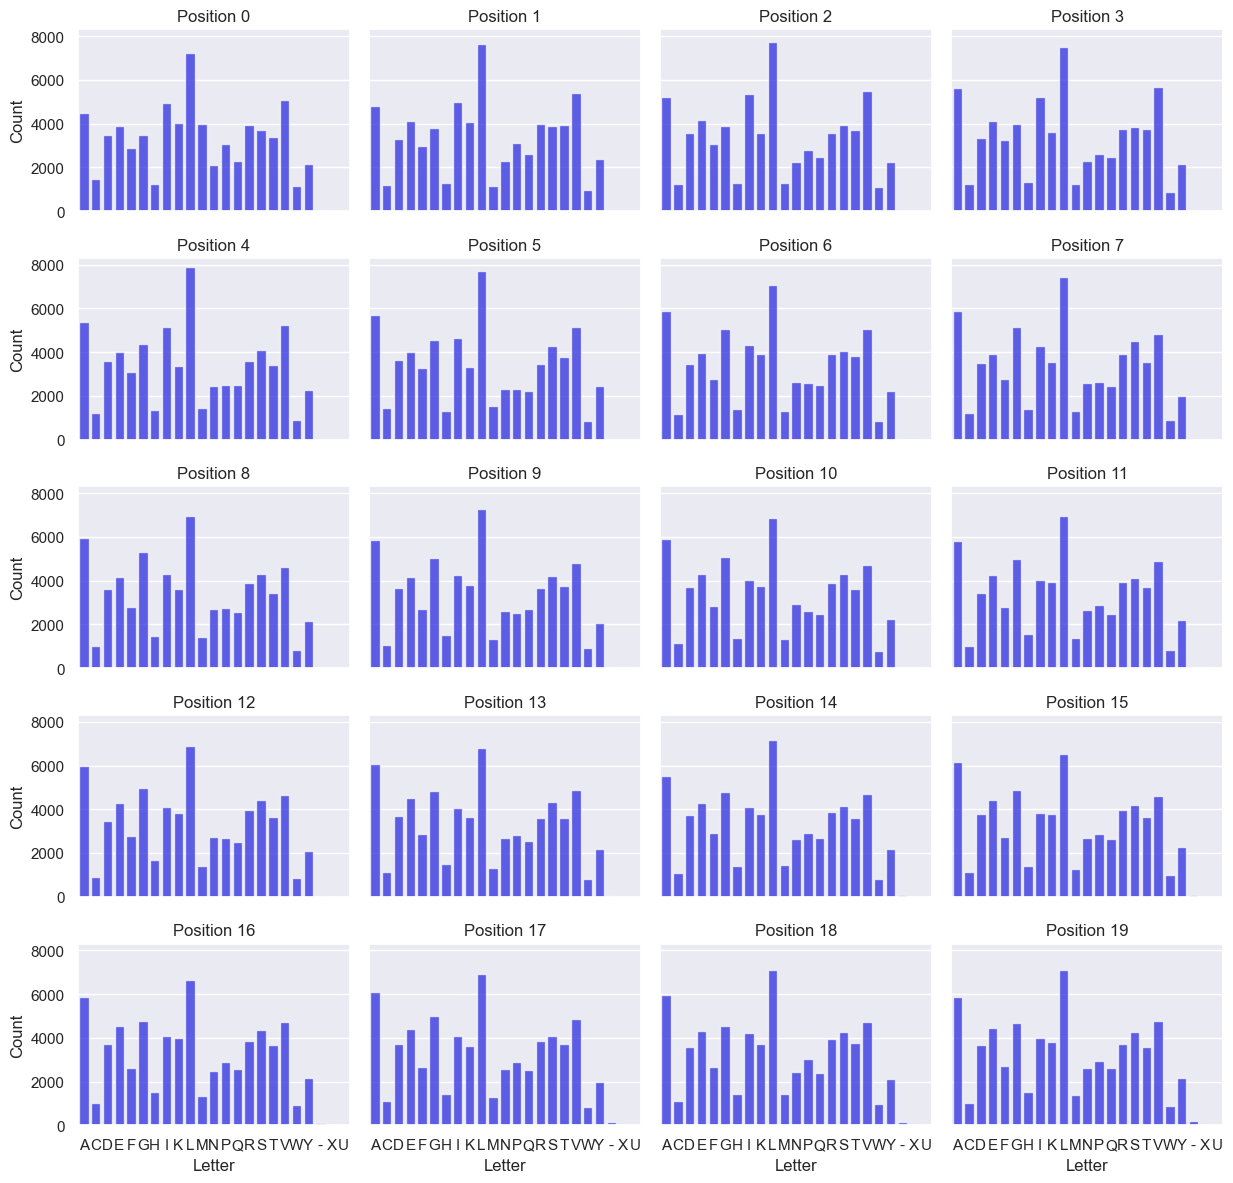

In [9]:
# plot first 20 positions, all look pretty similar
n_pos = 20
start = 0
positions_to_plot = range(start, start + n_pos)

n_cols = 4
n_rows = n_pos // n_cols
fig, axes = plt.subplots(
    n_rows, n_cols, figsize=(2.5 * n_rows, 3 * n_cols), sharey=True, sharex=True
)

for i, col in enumerate(positions_to_plot):
    r, c = divmod(i, n_cols)
    ax = axes[r, c]
    counts = df_split[col].value_counts().sort_index()
    sns.barplot(
        x=counts.index,
        y=counts.values,
        ax=ax,
        color="blue",
        alpha=0.7,
        edgecolor="white",
    )
    ax.set_title(f"Position {col}")
    ax.set_xlabel("Letter")
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()

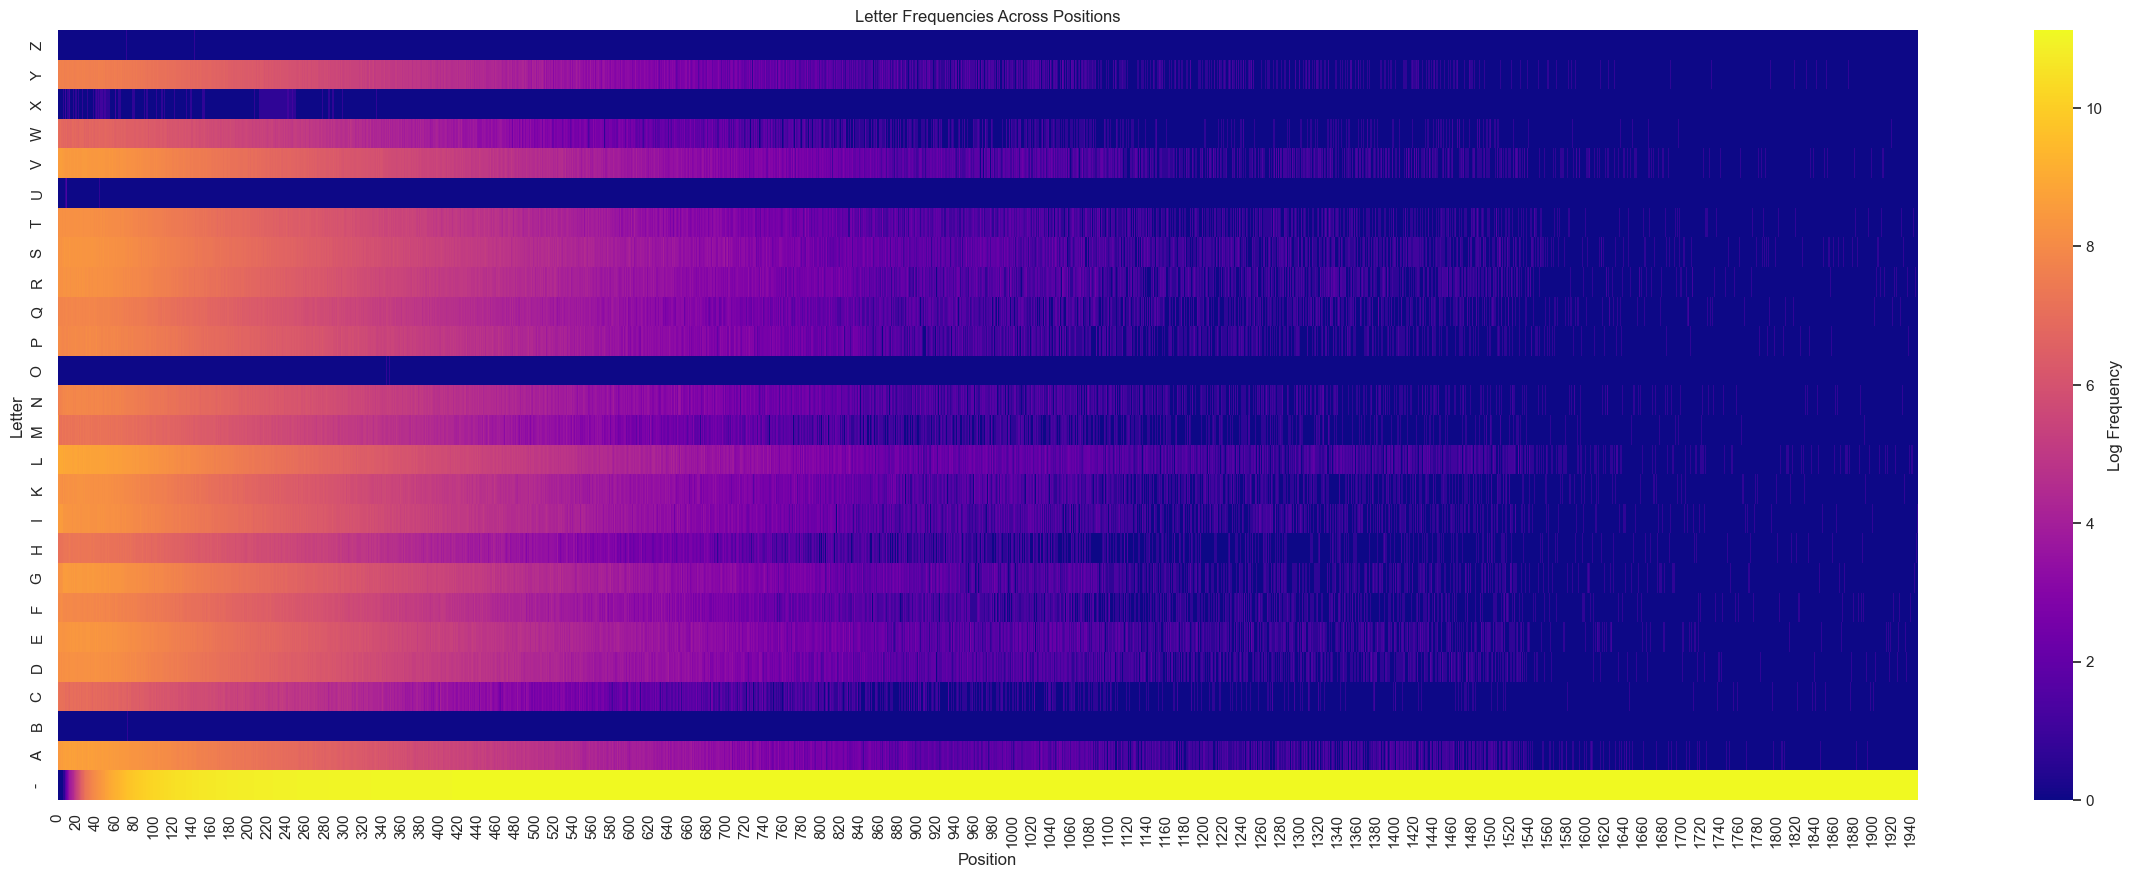

In [10]:
freq = df_split.apply(lambda x: np.log(1 + x.value_counts())).fillna(0)

freq = freq.sort_index(ascending=False)

plt.figure(figsize=(30, 10))
sns.heatmap(freq, cmap="plasma", cbar_kws={"label": "Log Frequency"})
plt.xlabel("Position")
plt.ylabel("Letter")
plt.title("Letter Frequencies Across Positions")
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=20))

# Control tick size as a lot of columns
step = 20
tick_positions = range(0, len(freq.columns), step)
tick_labels = freq.columns[::step]
plt.xticks(tick_positions, tick_labels, rotation=90)
plt.show()

Observations:
1. X, U, B, O, Z are particularly rare across all positions as stated by the dataset
2. The pad token frequency after around 200 increases to near max - most proteins are shorter than this
3. A,D,L,R,V are quite common 
4. striation/banded pattern behaviour - after the frequency of observing an acid goes down significantly, there are a lot of gaps in the heat map - not necessarily periodic, but not completely random either.

### Labels exploration
Basic things to get idea of:
- number of categories
- frequency distribution of categories (i.e. class imbalance)
- how many families/versions within each?

Counts distribution is highly skewed toward zero, most labels occur under 100 times, max is ~427 from the first 10 datasets.
Definitely going to need to deal with class imbalance appropriately (eg. weighted losses, balanced accuracy/precision/recall metrics, stratified sampling)

-  will also require a way to deal with unknown classes not seen at test time from training set

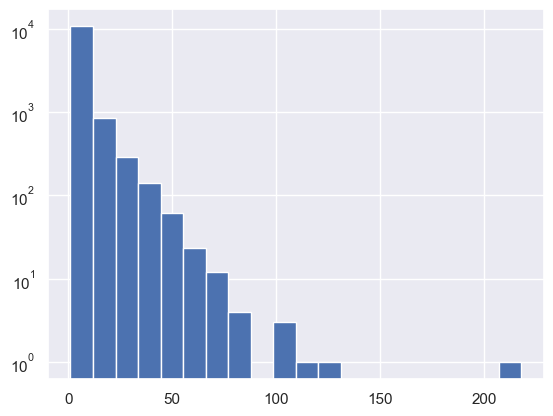

In [11]:
df.family_accession.value_counts().hist(log=True, bins=20);

In [12]:
df.family_accession.value_counts().head(10)

family_accession
PF13649.6     218
PF00560.33    125
PF13508.7     119
PF06580.13    105
PF00677.17    105
PF02397.16    102
PF00684.19     86
PF02885.17     85
PF02417.15     83
PF13472.6      79
Name: count, dtype: int64

In [13]:
df.family_accession.value_counts().head(10)

family_accession
PF13649.6     218
PF00560.33    125
PF13508.7     119
PF06580.13    105
PF00677.17    105
PF02397.16    102
PF00684.19     86
PF02885.17     85
PF02417.15     83
PF13472.6      79
Name: count, dtype: int64

In [14]:
df[["Family", "Version"]] = df.family_accession.str.split(".", expand=True)
df["Family"].value_counts().head(10)

Family
PF13649    218
PF00560    125
PF13508    119
PF06580    105
PF00677    105
PF02397    102
PF00684     86
PF02885     85
PF02417     83
PF13472     79
Name: count, dtype: int64

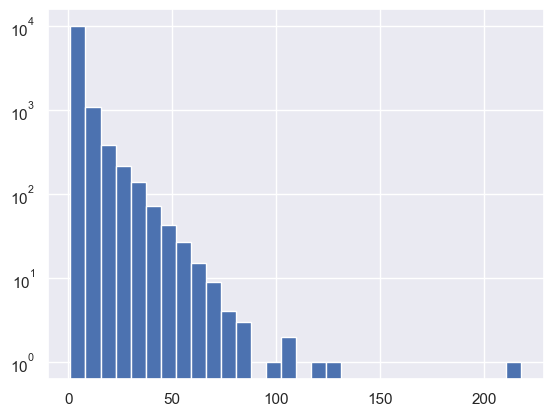

In [15]:
df["Family"].value_counts().hist(log=True, bins=30);

<Axes: >

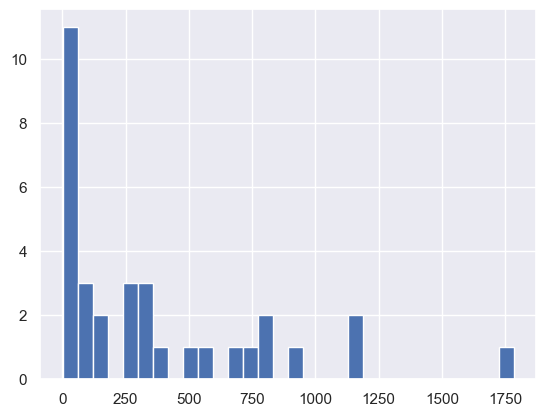

In [16]:
# each protein could have hundreds-thousands of versions
df[["Family", "Version"]].groupby("Family")["Version"].max().value_counts().hist(
    bins=30
)

In [ ]:
# 12000 + families
df["Family"].unique()

array(['PF05199', 'PF11103', 'PF13005', ..., 'PF03250', 'PF16155',
       'PF11444'], shape=(12107,), dtype=object)

### Questions:
1. What is the biological meaning of protein families/version numbers, how might a model learn similar protein families?
2. Are some predictions worse than others, should we penalise accordingly? eg. right family right version? Multilabel? Might a two-step process where we first predict the family, then given a family predict the version
be easier than an end to end solution?
3. Do the other data columns hold any useful information? Obviously, start with just the sequence itself.

### Understand number of labels in each split
* Get no. labels in each split
* how many labels are shared? are any missing from the train set but in the dev/test sets?

In [23]:
from pathlib import Path
from tqdm.notebook import tqdm
from collections import defaultdict

split_labels = defaultdict(set)
splits = ["train", "dev", "test"]

for split in splits:
    print(f"Split: {split}")
    for path in tqdm(Path(f"data/{split}").iterdir()):
        if not path.is_file():
            continue

        split_labels[split].update(pd.read_csv(path)["family_accession"].unique())

Split: train


0it [00:00, ?it/s]

Split: dev


0it [00:00, ?it/s]

Split: test


0it [00:00, ?it/s]

In [27]:
for split in splits:
    print(f"{len(split_labels[split])} domains in {split} set")

17929 domains in train set
13071 domains in dev set
13071 domains in test set


In [ ]:
# no missing, good to go if we use 17929 labels
for split in ["dev", "test"]:
    missing = split_labels[split].difference(split_labels["train"])
    print(f"{len(missing)} labels in {split} missing from train")

0 labels in dev missing from train
0 labels in test missing from train


In [48]:
class_labels = pd.DataFrame(
    split_labels["train"], columns=["family_accession"]
).sort_values(by="family_accession")
class_labels

,family_accession
10231,PF00001.21
15188,PF00002.24
5750,PF00003.22
13150,PF00004.29
5487,PF00005.27
...,...
11804,PF18867.1
10365,PF18868.1
11990,PF18869.1
13440,PF18870.1


In [51]:
class_labels.to_parquet("data/class_labels.parquet", index=False)